Data Handling

Loading the dataset from the csv, removing duplicates and corrupted values

In [34]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import json
import csv

# df = pd.read_csv("Amazon Items Cleaned.csv")
df = pd.read_csv("Amazon Items Scraped.csv")
print('Shape before cleaning: ' + str(df.shape))

# Remove Corrupted Rows ---------------------------------------------------------------------
df = df.dropna(axis = 0, thresh=8)
print('Shape after removing corrupted: ' + str(df.shape))

# Drop Duplicates --------------------------------------------------------------------------
df = df.drop_duplicates(subset = None, keep = 'first')
print('Shape after removing duplicates: ' + str(df.shape))



Shape before cleaning: (13134, 8)
Shape after removing corrupted: (5230, 8)
Shape after removing duplicates: (5116, 8)


Cleaning and normalizing the data

In [35]:
# Function - Delete char in string ---------------------------------------------------------

def deleteCharInString(df, c) :
    ilist = list()
    for i in df :
        ilist.append(i.replace(c, ''))
    df = ilist
    return df

In [36]:
# Cleaning the Brand name ------------------------------------------------------------------

df.Brand = deleteCharInString(df.Brand, "Brand:")
df.Brand = deleteCharInString(df.Brand, "Visit the ")
df.Brand = deleteCharInString(df.Brand, " Store")

print(df.Brand)

0                 Amazon
4          Amazon Basics
5                 Amazon
7                 Amazon
8                 EDIVIA
              ...       
12972     American Eagle
12991             Amazon
13002             Amazon
13031             Amazon
13117          Frito-Lay
Name: Brand, Length: 5116, dtype: object


In [37]:
# # Cleaning the Ratings ------------------------------------------------------------------

df.Rating = deleteCharInString(df.Rating, " ratings")
df.Rating = deleteCharInString(df.Rating, " rating")
df.Rating = deleteCharInString(df.Rating, ",")
df["Rating"] = df.Rating.astype(float)
df = df.reset_index(drop=True)
print(df.Rating)

0        64803.0
1         7851.0
2       145478.0
3       117007.0
4           82.0
          ...   
5111      5999.0
5112      3950.0
5113      7520.0
5114      3014.0
5115     17706.0
Name: Rating, Length: 5116, dtype: float64


In [38]:
# Cleaning the Stars ------------------------------------------------------------------
#changed to removing the row
df.Stars = deleteCharInString(df.Stars, " out of 5")
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("How confident are you in finding a size that will fit you well?", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("|", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("confirmed", '0'))
df.Stars = ilist
ilist = list()
for i in df.Stars :
    ilist.append(i.replace("4,8 von 5", '4.8'))
df.Stars = ilist

df



,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,Amazon Ethernet Adapter for Amazon Fire TV Dev...,Amazon,64803.0,0,1,1000+ answered questions,0,4.5
1,Amazon Basics Dual-Port USB Car Charger Adapte...,Amazon Basics,7851.0,0,1,82 answered questions,0,4.6
2,Echo Auto- Hands-free Alexa in your car with y...,Amazon,145478.0,0,1,1000+ answered questions,0,4
3,"Echo (4th Gen) | With premium sound, smart hom...",Amazon,117007.0,0,1,1000+ answered questions,0,4.7
4,"Stylus Pencil for Amazon Fire HD 10 Pen, EDIVI...",EDIVIA,82.0,0,1,0,$16.99,4.3
...,...,...,...,...,...,...,...,...
5111,American Eagle Gift Card,American Eagle,5999.0,0,0,4 answered questions,$25.00,4.9
5112,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15 answered questions,$100.00,4.9
5113,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12 answered questions,$10.00,4.9
5114,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3 answered questions,$30.00,4.9


In [39]:
# Cleaning the Price ------------------------------------------------------------------

df.Price = deleteCharInString(df.Price, "$")
df.Price = deleteCharInString(df.Price, ",")
df["Price"] = df.Price.astype(float)
df = df.reset_index(drop=True)
print(df.Price)

0         0.00
1         0.00
2         0.00
3         0.00
4        16.99
         ...  
5111     25.00
5112    100.00
5113     10.00
5114     30.00
5115     28.00
Name: Price, Length: 5116, dtype: float64


In [40]:
# Cleaning the Comments ------------------------------------------------------------------

df.Comments = deleteCharInString(df.Comments, "+")
df.Comments = deleteCharInString(df.Comments, " answered questions")
df["Comments"] = df.Comments.astype(float)
df = df.reset_index(drop=True)
print(df.Comments)


0       1000.0
1         82.0
2       1000.0
3       1000.0
4          0.0
         ...  
5111       4.0
5112      15.0
5113      12.0
5114       3.0
5115      33.0
Name: Comments, Length: 5116, dtype: float64


In [41]:
df.to_csv('Amazon Items Cleaned.csv',index= None)

First look on the data

In [42]:
# Non null means our data is full without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5116 non-null   object 
 1   Brand         5116 non-null   object 
 2   Rating        5116 non-null   float64
 3   BestSeller    5116 non-null   int64  
 4   AmazonChoice  5116 non-null   int64  
 5   Comments      5116 non-null   float64
 6   Price         5116 non-null   float64
 7   Stars         5116 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 319.9+ KB


Checking data after cleaning

In [43]:

df.describe(include='all')

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
count,5116,5116,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000,5116
unique,4131,1755,NaN,NaN,NaN,NaN,NaN,36
top,The Franklin Mint Founding Fathers Coin Collec...,0,NaN,NaN,NaN,NaN,NaN,0
freq,8,1662,NaN,NaN,NaN,NaN,NaN,770
mean,NaN,NaN,6562.867866,0.020328,0.133503,33.890735,45.650004,NaN
std,NaN,NaN,30537.459072,0.141135,0.340151,127.248506,182.150969,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,37.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,312.500000,0.000000,0.000000,0.000000,12.990000,NaN
75%,NaN,NaN,2308.000000,0.000000,0.000000,10.000000,29.990000,NaN


Frequency table check for best seller items

we can see in the pie chart that 2.8% of overall products

   BestSeller  Frequency          p
0           0       5012  97.967162
1           1        104   2.032838


<AxesSubplot:ylabel='BestSeller'>

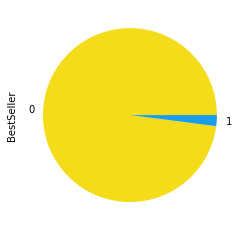

In [44]:
# Show the Frequency of the Best Sellers items with PIE visualization -------------------------------------------------------------------------------

counts = df["BestSeller"].value_counts()
p = df["BestSeller"].value_counts(normalize = True) * 100
index = [0,1]
FrequencyDF = pd.DataFrame({"BestSeller" : index,"Frequency": counts, "p" : p})
print(FrequencyDF)

myColors = ['#F5DC1A', '#179deb']
df['BestSeller'].value_counts().plot(kind = 'pie', colors = myColors)


(-4.636, 927.2]     5085
(927.2, 1854.4]       17
(1854.4, 2781.6]      10
(3708.8, 4636.0]       3
(2781.6, 3708.8]       1
Name: Price, dtype: int64


(array([5.085e+03, 1.700e+01, 1.000e+01, 1.000e+00, 3.000e+00]),
 array([   0. ,  927.2, 1854.4, 2781.6, 3708.8, 4636. ]),
 <BarContainer object of 5 artists>)

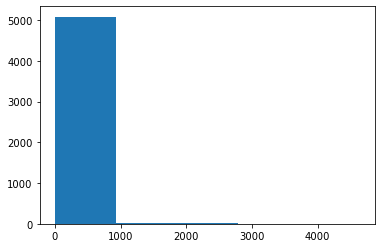

In [45]:
# We can see that most of the items in amazon are falling under the first section in the histogram price < 500 ------------------------------------------------

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

print(pd.cut(df["Price"], bins=5).value_counts())
plt.hist(df["Price"], bins = 5)

(array([5.085e+03, 1.700e+01, 1.000e+01, 1.000e+00, 3.000e+00]),
 array([   0. ,  927.2, 1854.4, 2781.6, 3708.8, 4636. ]),
 <BarContainer object of 5 artists>)

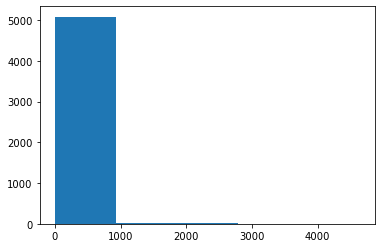

In [46]:
# Finding the amount of Exception in Price --------------------------------------------

plt.hist(df.Price, bins = 5)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

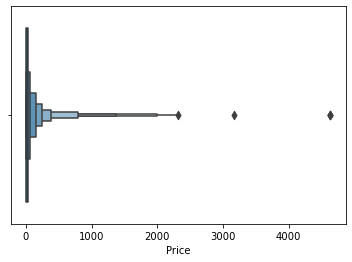

In [47]:
import seaborn as sns

sns.boxenplot(df.Price)

In [48]:
df.Price.describe()


print(df["Price"].describe())

Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

fareOutlierRows = df[(df["Price"] < Q1 - 1.5 * IQR) | (df["Price"] > Q3 - 1.5 * IQR )].index
print(len(fareOutlierRows))

count    5116.000000
mean       45.650004
std       182.150969
min         0.000000
25%         0.000000
50%        12.990000
75%        29.990000
max      4636.000000
Name: Price, dtype: float64
5116


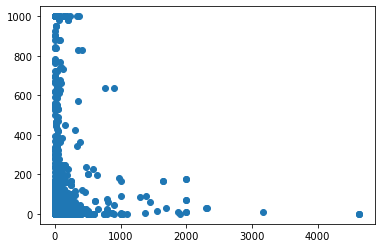

In [49]:
# Here we can see that the amount of comments on an item does not affect the stars the item gets

# plt.scatter(df.Comments, df.Stars)
# plt.scatter(df.Price, df.Stars)
plt.scatter(df.Price, df.Comments)
# plt.scatter(df.Price, df.BestSeller)
# plt.scatter(df.Price, df.Rating)
# plt.scatter(df.Comments, df.Rating)
# plt.scatter(df.Comments, df.Stars)


In [50]:
df.Price[df.Price < 500].count()/df.Price.count()

print(df.Price[df.Price > 500].count())
# df.Price[df.Price > 1000] = np.nan

# print(df.shape)

# df = df.dropna(axis= 0 , thresh= 8)

# print(df.shape)

# df.Price.describe()




55


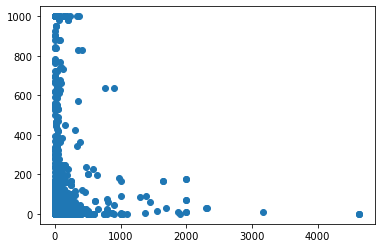

In [51]:
plt.scatter(df.Price, df.Comments)


In [52]:
z_comments = (df['Comments'] - df['Comments'].mean()) / df['Comments'].std()
outliers = abs(z_comments) < 1000
sum(outliers)


5116

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

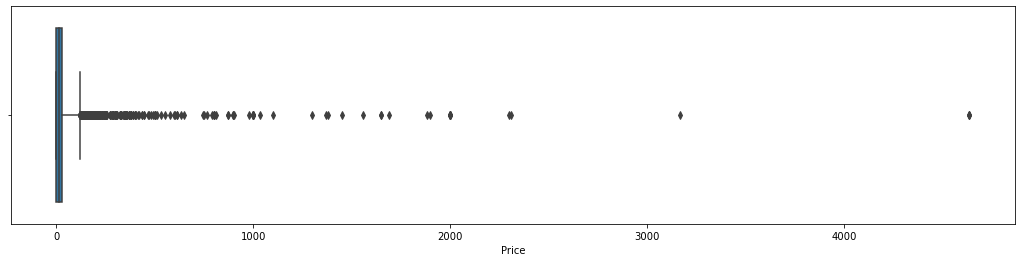

In [53]:


fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Comments'>

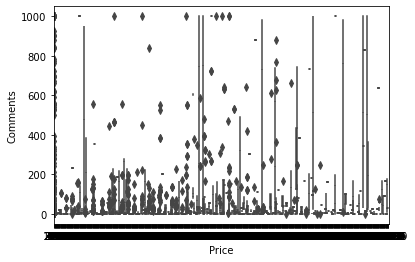

In [54]:
sns.boxplot(df.Price,df.Comments)

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Comments'>

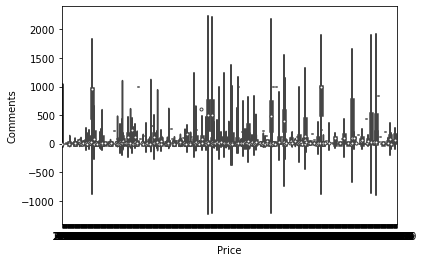

In [55]:
sns.violinplot(df.Price,df.Comments)